import the required libraries 

In [24]:
import pandas as pd
import missingno as msn
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


Exploratory Data Analysis (EDA)

In [2]:
Wine_data=pd.read_csv('WineQT.csv')
print(Wine_data.head())
print('the shape of the data is  {}'.format(Wine_data.shape))
Wine_data.drop('Id',axis=1 ,inplace=True)
X=Wine_data.drop('quality',axis=1)
y=Wine_data['quality']

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

visualasation of the data using PCA
1-first we need to scale the data 

In [3]:
scaler=StandardScaler()
X_scalled=scaler.fit_transform(X)
PCA_=PCA(n_components=2)
X_PCA=PCA_.fit_transform(X_scalled)
X_scalled_DF=pd.DataFrame(data=X_PCA,columns = ['principal component 1', 'principal component 2'])
print('Explained variation per principal component: {}'.format(PCA_.explained_variance_ratio_))
X_scalled_DF.head()

Explained variation per principal component: [0.28692345 0.17075104]


,principal component 1,principal component 2
0,-1.561545,0.444892
1,-0.760892,1.915058
2,-0.708085,0.914423
3,2.308166,-0.224448
4,-1.561545,0.444892


clean the data

visualisation of the data 

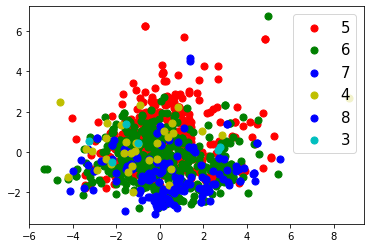

In [4]:
targets=y.unique()
colors=['r', 'g','b','y','b','c']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    plt.scatter(X_scalled_DF.loc[indicesToKeep, 'principal component 1']
               , X_scalled_DF.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
plt.legend(targets,prop={'size': 15})               
plt.show()               


In [5]:
print(Wine_data.info())
print(Wine_data.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB
None
                       count       mean        std      min       25%  \
fixed acidity         1143.0   8.311111   1.7475

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


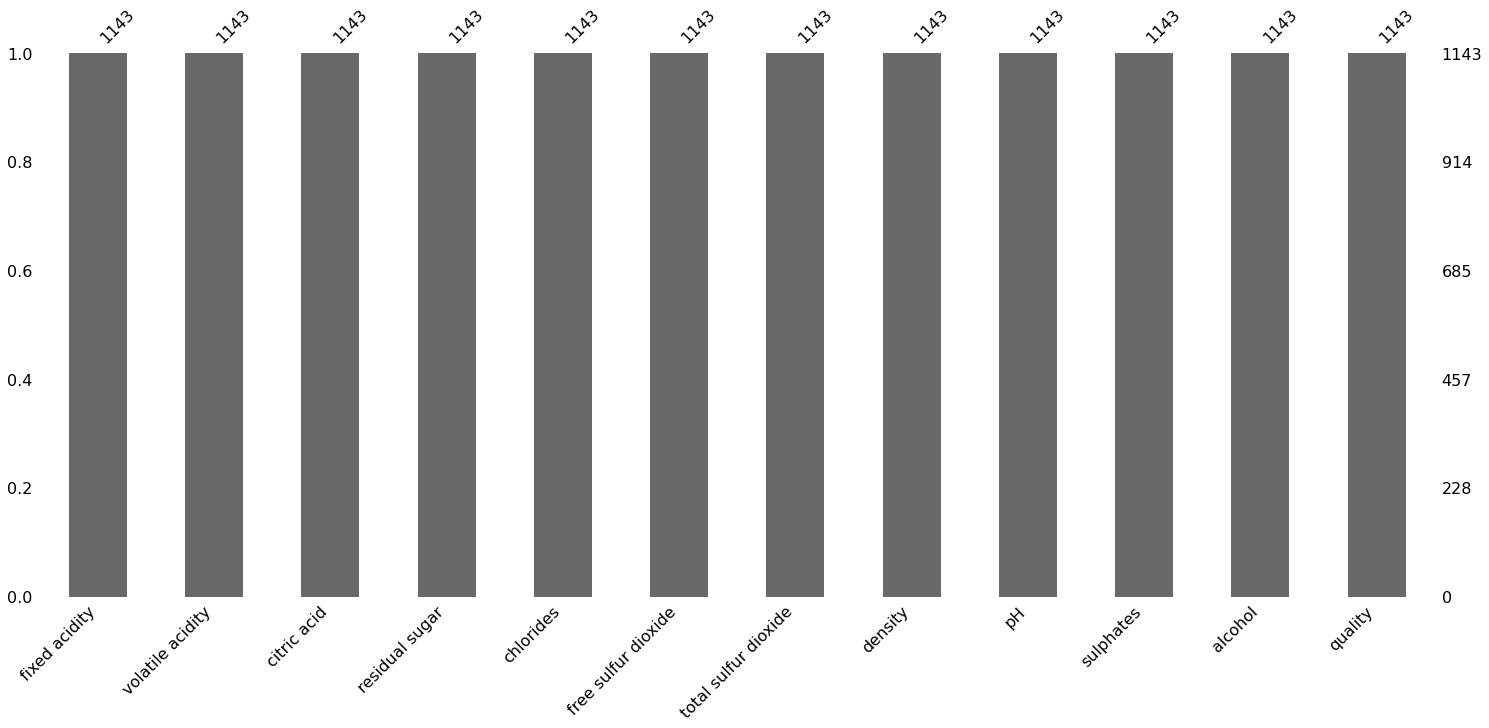

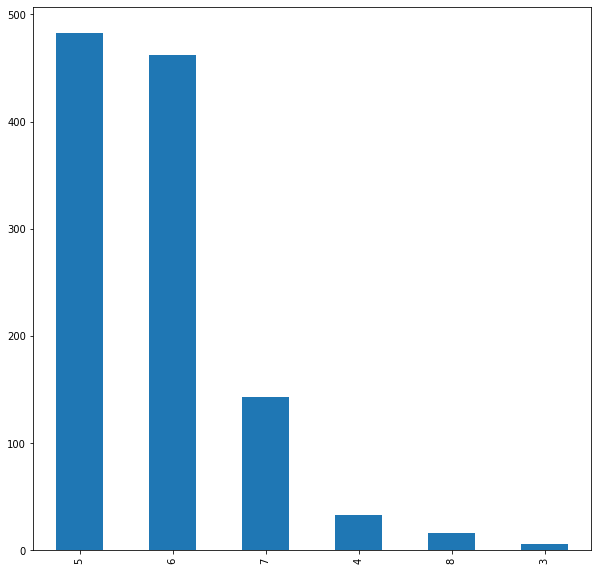

In [6]:
print(Wine_data['quality'].value_counts())
print(Wine_data.isna().sum())
msn.bar(Wine_data)
plt.show()
Wine_data['quality'].value_counts().plot(kind='bar',figsize=(10,10))
plt.show()

check the correlation of the dataset

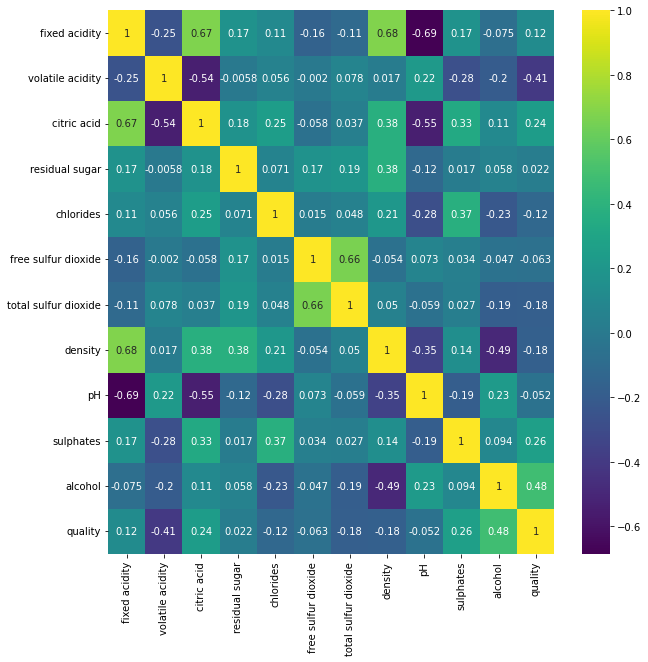

In [7]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(Wine_data.corr(),cmap='viridis',annot=True)
plt.show()

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368 

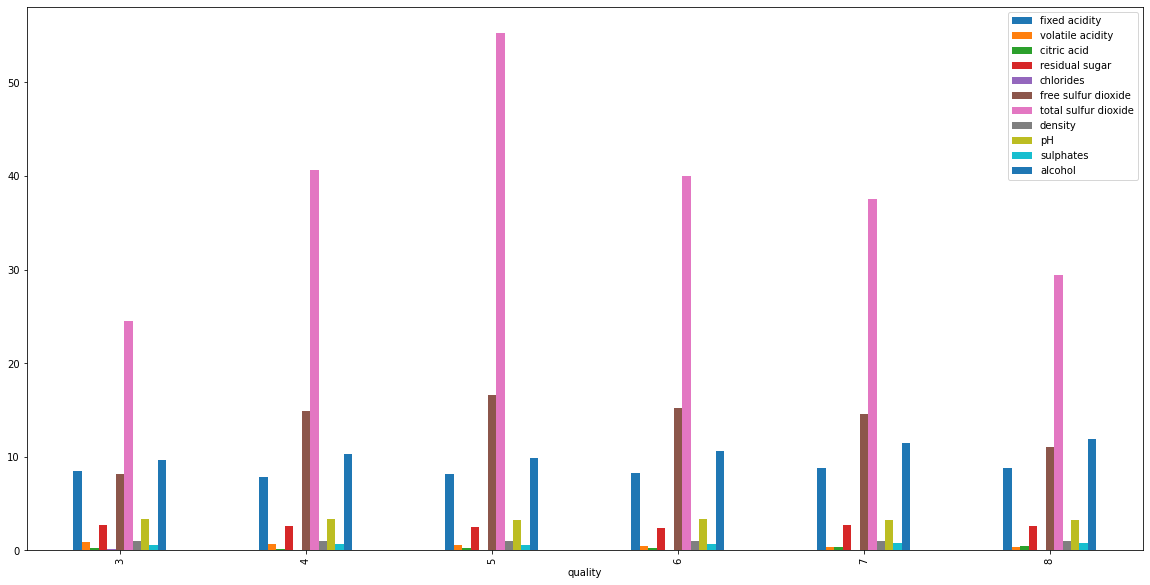

In [8]:
the_destrubution_of_data=Wine_data.groupby('quality').mean()
print(the_destrubution_of_data)
the_destrubution_of_data.plot(kind='bar',figsize=(20,10))
plt.show()

now we visualase the effect of each feature on the quality of the wine 

In [9]:
print(Wine_data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


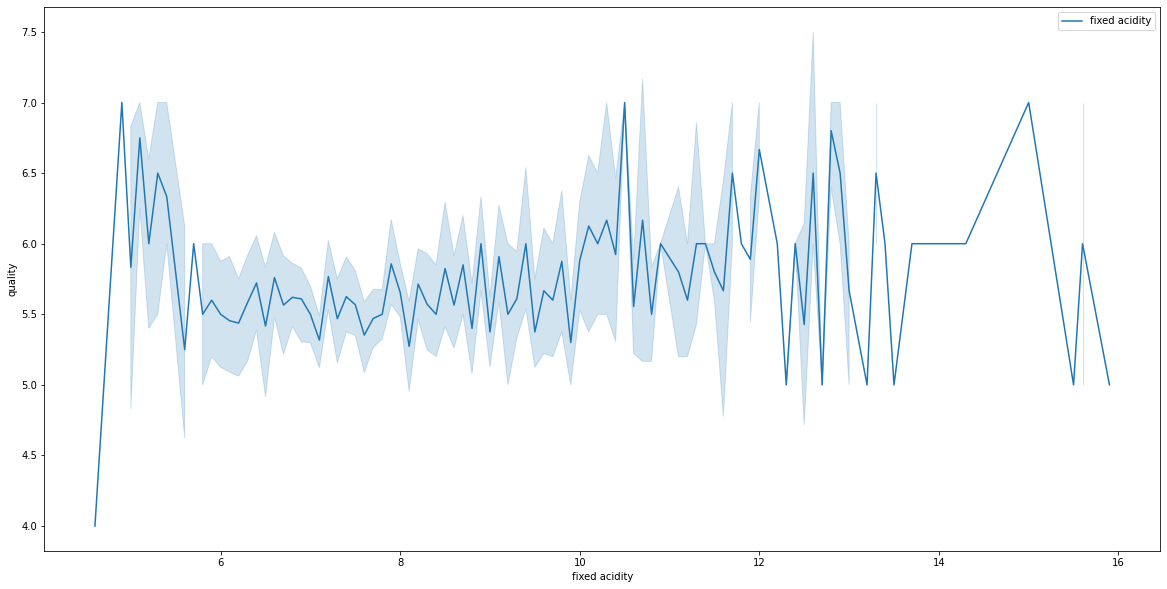

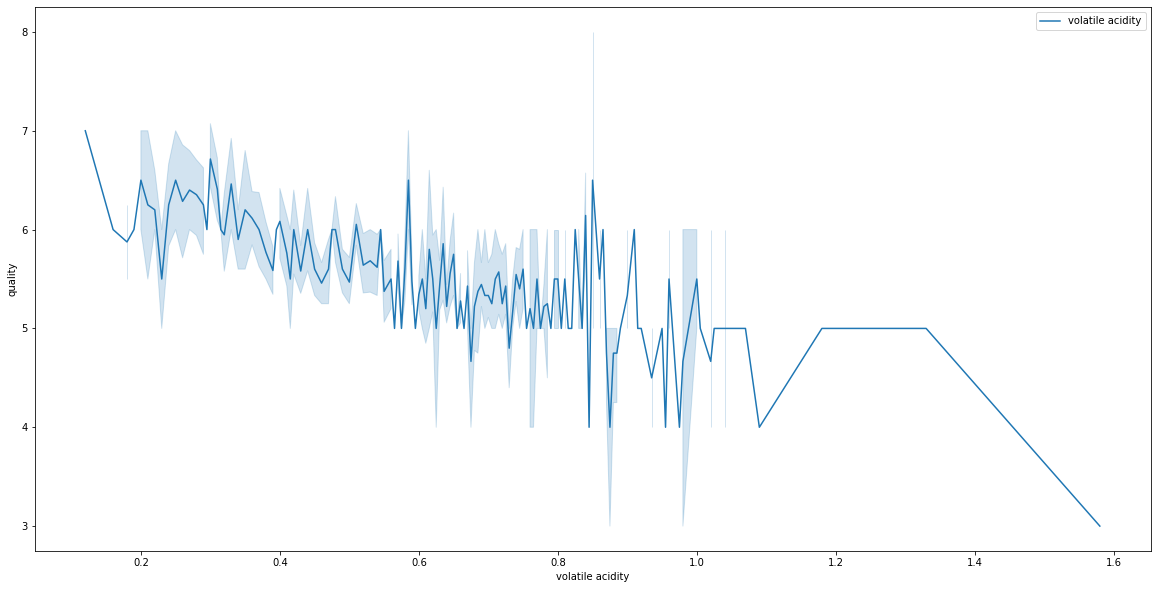

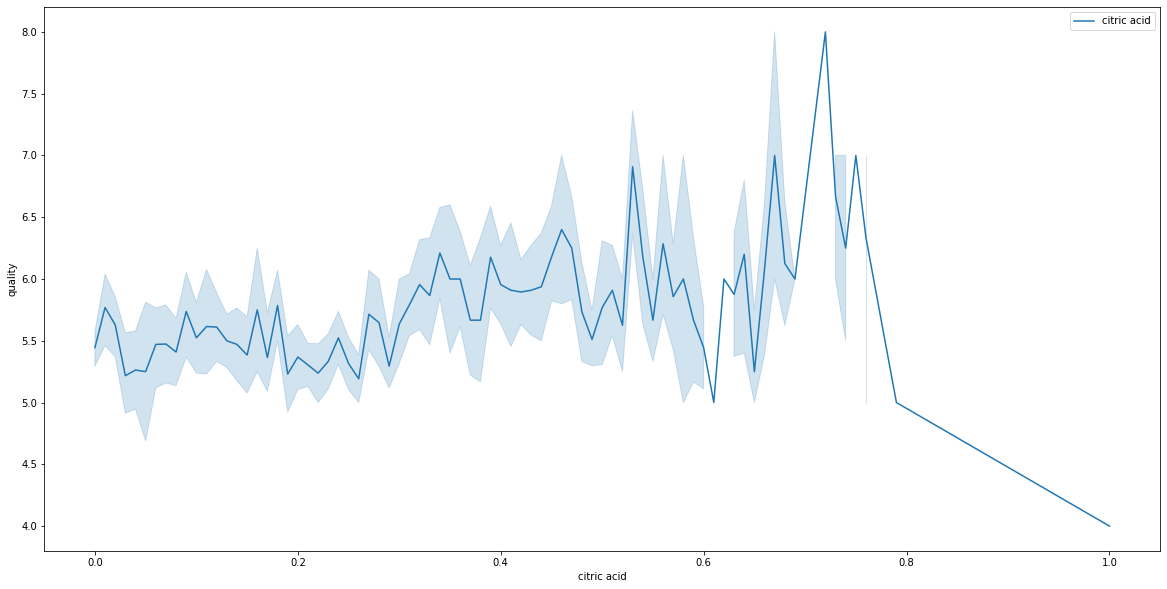

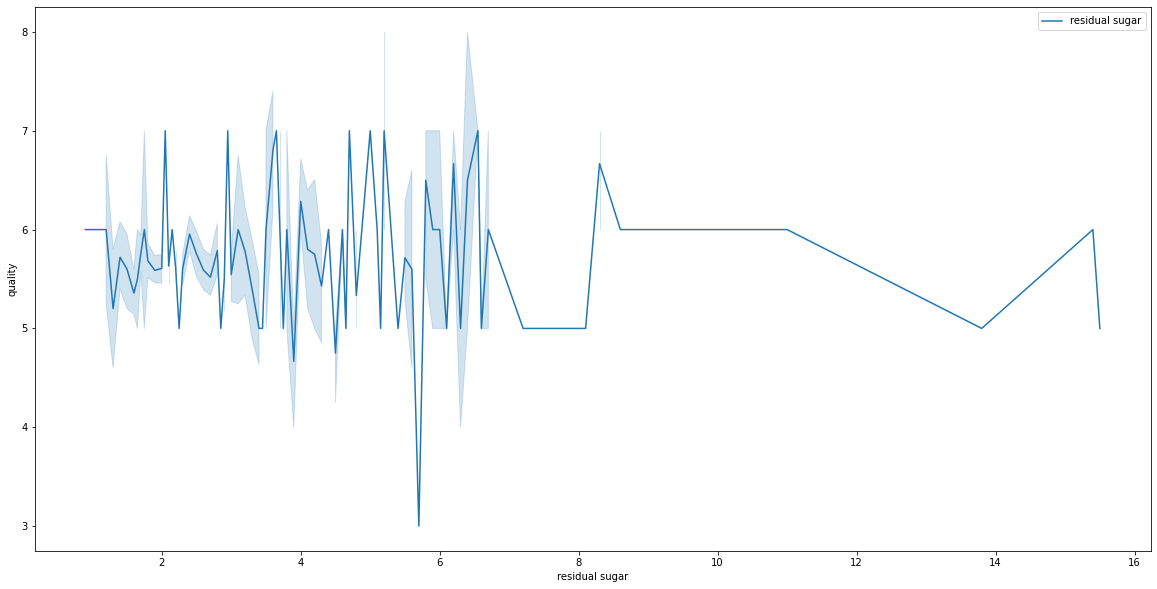

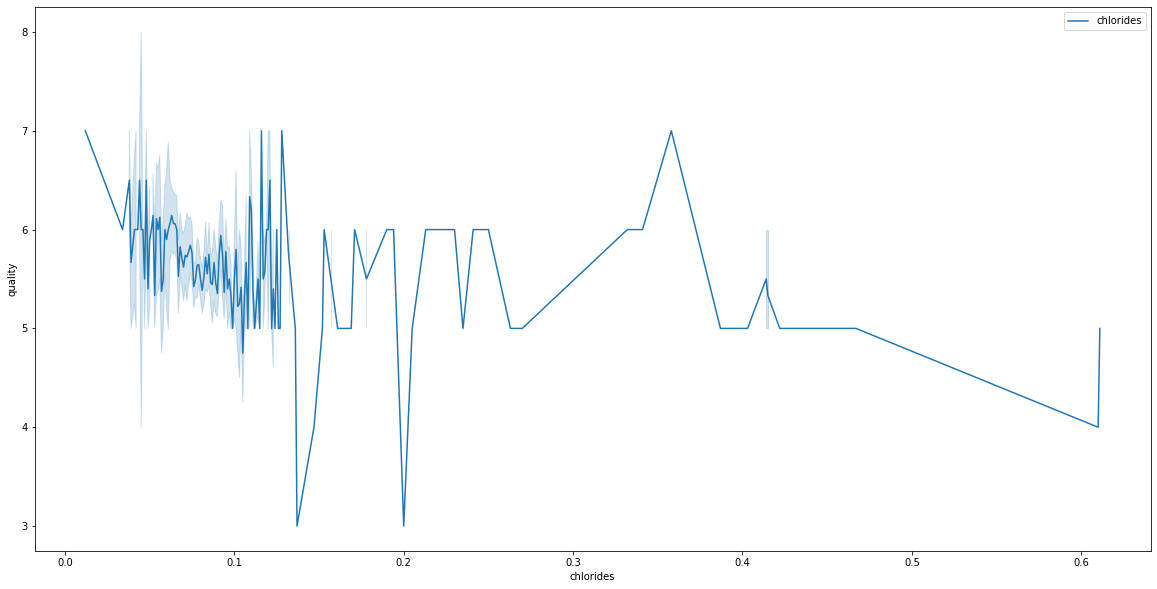

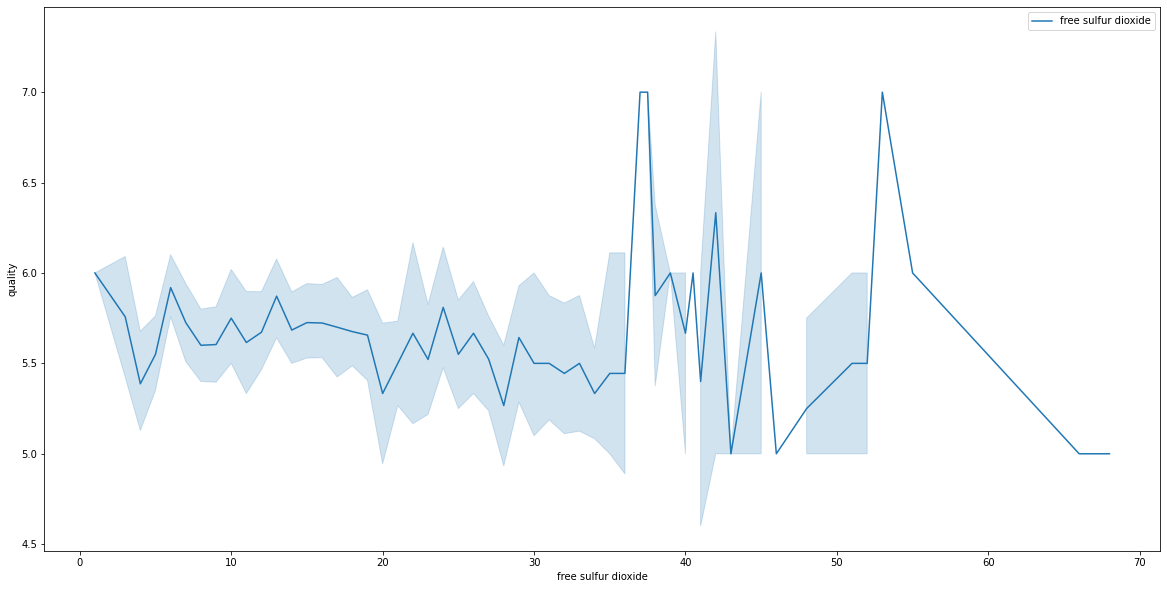

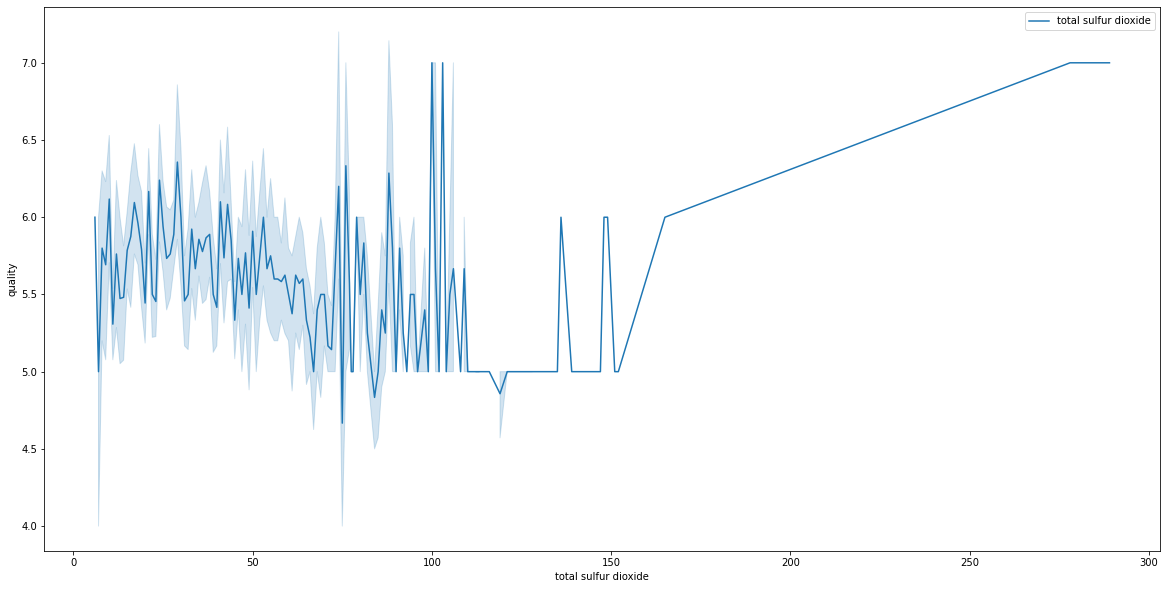

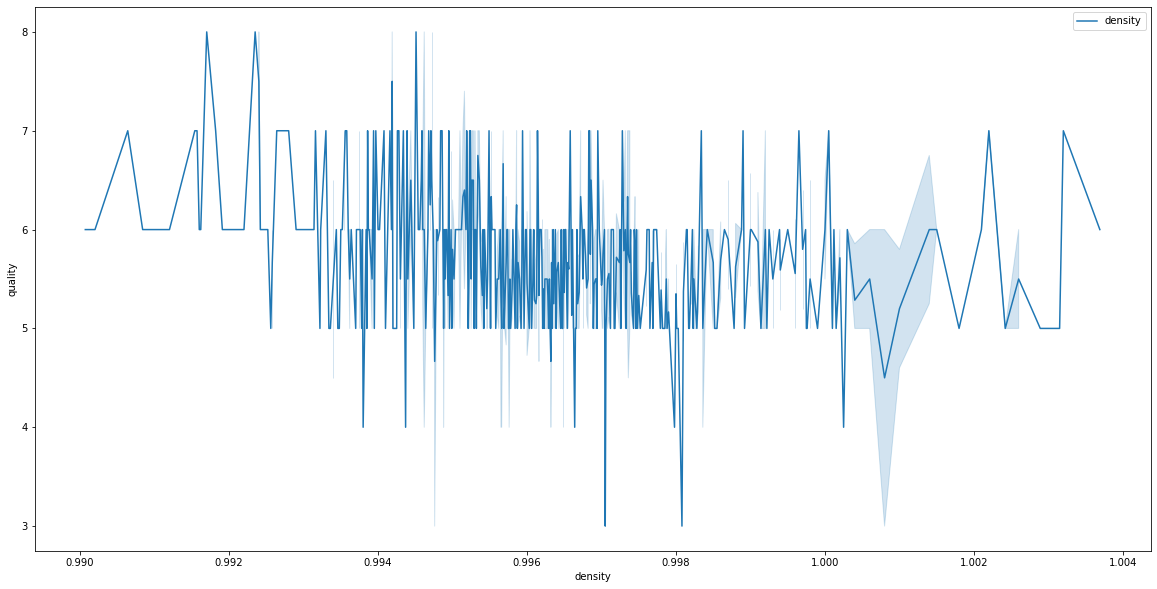

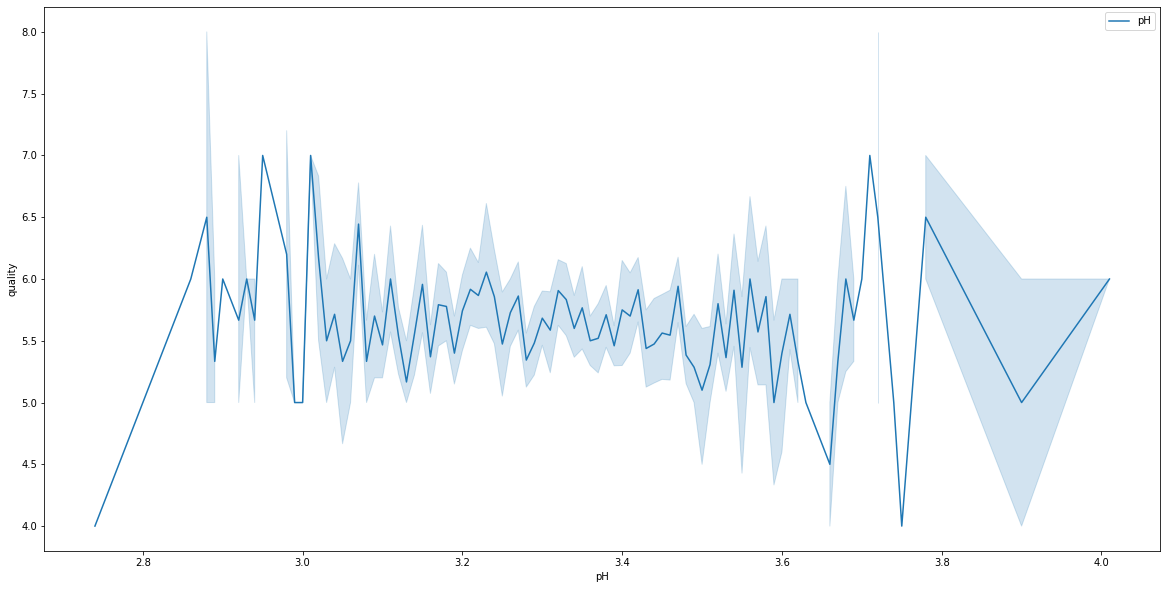

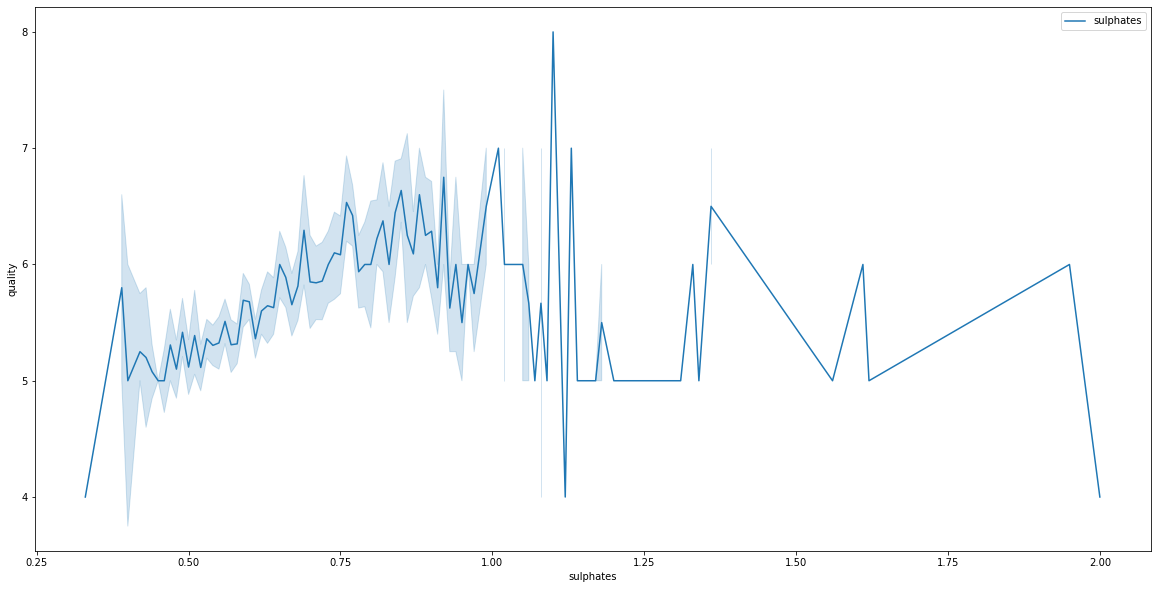

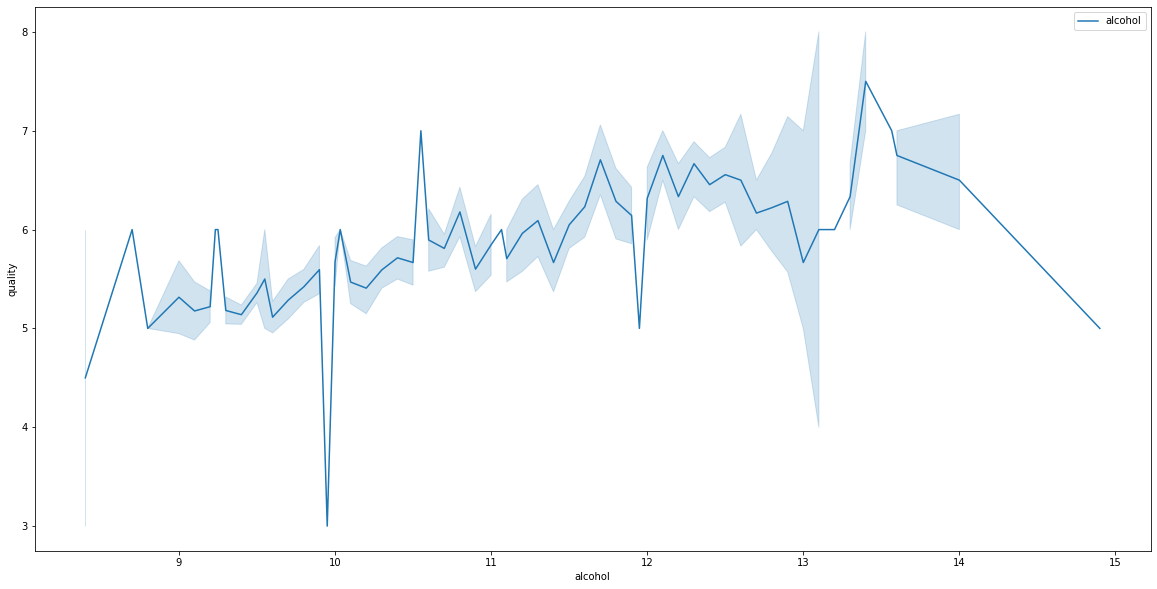

In [10]:
for feature in list(X.columns):
    plt.figure(figsize=(20,10))
    sns.lineplot(data=Wine_data,x=feature,y='quality', label=feature)
    plt.show()    

feature enginerring
1-fix the probleme of the inbalanced dataset


In [11]:
#first let's separate the dataset
'''print(y.value_counts())
wine_3=Wine_data[Wine_data['quality']==3]
wine_4=Wine_data[Wine_data['quality']==4]
wine_5=Wine_data[Wine_data['quality']==5]
wine_6=Wine_data[Wine_data['quality']==6]
wine_7=Wine_data[Wine_data['quality']==7]
wine_8=Wine_data[Wine_data['quality']==8]
print(wine_3.shape)'''

"print(y.value_counts())\nwine_3=Wine_data[Wine_data['quality']==3]\nwine_4=Wine_data[Wine_data['quality']==4]\nwine_5=Wine_data[Wine_data['quality']==5]\nwine_6=Wine_data[Wine_data['quality']==6]\nwine_7=Wine_data[Wine_data['quality']==7]\nwine_8=Wine_data[Wine_data['quality']==8]\nprint(wine_3.shape)"

first technique : Random Over-Sampling

In [12]:
'''wine_3_over=wine_3.sample(483, replace=True)
wine_4_over=wine_4.sample(483, replace=True)
wine_6_over=wine_6.sample(483, replace=True)
wine_7_over=wine_7.sample(483, replace=True)
wine_8_over=wine_8.sample(483, replace=True)
Wine_data_over=pd.concat([wine_3_over,wine_4_over,wine_5,wine_6_over,wine_7_over,wine_8_over],axis=0)
print(Wine_data_over.shape)
print(Wine_data.shape)'''

'wine_3_over=wine_3.sample(483, replace=True)\nwine_4_over=wine_4.sample(483, replace=True)\nwine_6_over=wine_6.sample(483, replace=True)\nwine_7_over=wine_7.sample(483, replace=True)\nwine_8_over=wine_8.sample(483, replace=True)\nWine_data_over=pd.concat([wine_3_over,wine_4_over,wine_5,wine_6_over,wine_7_over,wine_8_over],axis=0)\nprint(Wine_data_over.shape)\nprint(Wine_data.shape)'

seconde technique : Random over-sampling with imblearn

In [13]:
'''ros=RandomOverSampler(random_state=42)
X_ros,y_ros=ros.fit_resample(X,y)
print('Original dataset shape', y.value_counts())
print('Resampled dataset shape', y_ros.value_counts())'''

"ros=RandomOverSampler(random_state=42)\nX_ros,y_ros=ros.fit_resample(X,y)\nprint('Original dataset shape', y.value_counts())\nprint('Resampled dataset shape', y_ros.value_counts())"

 Synthetic Minority Oversampling Technique

In [14]:
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X,y)
print('Original dataset shape', y.value_counts())
print('Resampled dataset shape', y_smote.value_counts())

Original dataset shape 5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64
Resampled dataset shape 5    483
6    483
7    483
4    483
8    483
3    483
Name: quality, dtype: int64


train a bunch of models and see how gave us the best performance 

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,stratify=y_smote,random_state=0)

Logistic Regression 

In [16]:
LR_model=LogisticRegression()
LR_model.fit(X_train,y_train)
print('the scorre of the model is {}'.format(LR_model.score(X_test,y_test)))
print('the confusion matrix of this model is \n {}'.format(confusion_matrix(y_test,LR_model.predict(X_test),labels=y.unique())))
print('the classification report is\n {} '.format(classification_report(y_test,LR_model.predict(X_test),labels=y.unique())))


the scorre of the model is 0.5213793103448275
the confusion matrix of this model is 
 [[42 28  5 27  7 12]
 [21 41 18 23 13  5]
 [ 1 22 54  6 34  4]
 [23 14  0 64  0 20]
 [ 0  3 39  0 78  0]
 [ 1  0  0 21  0 99]]
the classification report is
               precision    recall  f1-score   support

           5       0.48      0.35      0.40       121
           6       0.38      0.34      0.36       121
           7       0.47      0.45      0.46       121
           4       0.45      0.53      0.49       121
           8       0.59      0.65      0.62       120
           3       0.71      0.82      0.76       121

    accuracy                           0.52       725
   macro avg       0.51      0.52      0.51       725
weighted avg       0.51      0.52      0.51       725
 


c:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


as we see the score of logistic regression is not that good 
so we will try to tune the parametrs to get a beter score 

In [17]:
param_grid={'n_neighbors':[4,5,6,10,15,20,30,35]}
KNC_model=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10)
KNC_model.fit(X_train,y_train)
print('the score of the model is {}'.format(KNC_model.score(X_test,y_test)))
print('the confusion matrix of this model is \n {}'.format(confusion_matrix(y_test,KNC_model.predict(X_test),labels=y.unique())))
print('the classification report is\n {} '.format(classification_report(y_test,KNC_model.predict(X_test),labels=y.unique())))
print('the best parameter is {}'.format(KNC_model.best_params_))

the score of the model is 0.7062068965517241
the confusion matrix of this model is 
 [[ 49  20  10  24   6  12]
 [ 30  35  10  19  13  14]
 [  7   8  99   3   1   3]
 [  5   3   2 107   1   3]
 [  1   4   5   1 108   1]
 [  3   2   0   2   0 114]]
the classification report is
               precision    recall  f1-score   support

           5       0.52      0.40      0.45       121
           6       0.49      0.29      0.36       121
           7       0.79      0.82      0.80       121
           4       0.69      0.88      0.77       121
           8       0.84      0.90      0.87       120
           3       0.78      0.94      0.85       121

    accuracy                           0.71       725
   macro avg       0.68      0.71      0.68       725
weighted avg       0.68      0.71      0.68       725
 
the best parameter is {'n_neighbors': 4}


Naive Bayes Classifiers

In [18]:
Naive_model=GaussianNB()
Naive_model.fit(X_train,y_train)
print('the score of the model is {}'.format(Naive_model.score(X_test,y_test)))

the score of the model is 0.5351724137931034


Random forest

In [28]:
param_grid={'n_estimators':[50,75,100,125] ,
'max_depth':[10,20,30,40],
'min_samples_split':[5,8,10,15,20],
'min_samples_leaf':[2,4,6,8,10]
}
random_forest=GridSearchCV(RandomForestClassifier(),param_grid, n_jobs=-1,cv=5)
#random_forest=RandomForestClassifier()
random_forest.fit(X_train,y_train)
print(random_forest.best_params_)
print(random_forest.best_score_)
print(random_forest.score(X_test,y_test))

 AdaBoost Algorithm

In [ ]:

AdaBoost=GridSearchCV(AdaBoostClassifier())